<h1 style="text-align: center;background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>  Table Of Contents</b></h1>
<li><a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab"
        aria-controls="settings">1. Importing Libraries<span class="badge badge-primary badge-pill">1</span></a>
</li>
<li><a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab"
        aria-controls="settings">2. Data Preprocessing<span class="badge badge-primary badge-pill">2</span></a>
</li>
<li><a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab"
        aria-controls="settings">3. Exploratory Data Analysis<span class="badge badge-primary badge-pill">3</span></a>
</li>
<li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab"
        aria-controls="settings">4. Correlation<span class="badge badge-primary badge-pill">4</span></a>
</li>
<li><a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab"
        aria-controls="settings">5. Data Split<span class="badge badge-primary badge-pill">5</span></a>
</li>

<li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab"
        aria-controls="settings">6. Regression Models <span class="badge badge-primary badge-pill">6</span></a>
</li>

<li><a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab"
        aria-controls="settings">7. Conclusion <span class="badge badge-primary badge-pill">7</span></a>
</li>


<ul style="list-style-type:none;">
        <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab"

<h1 style="text-align: center;background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>  Health Insurance-Covered Medical Costs Prediction</b></h1>

<h3 style = "border-bottom: 3px solid black; padding: 8px"><b>Dataset Description</b></h3>

 This analysis aims to forecast medical expenses using patient information. 
The dataset utilized is sourced from Kaggle and consists of 1338 observations and 7 variable.This will be achieved by creating a predictive model.<br><br>
> - **Age**: The age of the patient.<br><br>
> - **Sex**:  The gender of the patient.<br><br>
> - **BMI**: Body Mass Index, a measure of body fat based on height and weight.<br><br>
> - **Children**:  The number of children or dependents covered by the insurance<br><br>
> - **Smoker**:  Indicates whether the client smokes or not.<br><br>
> - **Region**:  <br>The geographical region of the patient.<br>
> - **Charges**:  <br> The medical expenses incurred by the patient.<br>



<h1 style="background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>1.  Importing Libraries</b></h1><a id = "1" ></a>

In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,Yes,southwest,16884.92400
1,18,male,33.770,1,No,southeast,1725.55230
2,28,male,33.000,3,No,southeast,4449.46200
3,33,male,22.705,0,No,northwest,21984.47061
4,32,male,28.880,0,No,northwest,3866.85520


<h1 style="background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>2.  Data Preprocessing</b></h1><a id = "2" ></a>

In [4]:
# Number of rows and columns
df.shape

(1338, 7)

In [5]:
# Looking for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
sex - 0%
bmi - 0%
children - 0%
smoker - 0%
region - 0%
charges - 0%


In [6]:
# Explore the descriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# Convert object in numeric 
df_convert_numeric = df
for col_name in df_convert_numeric.columns:
    if (df_convert_numeric[col_name].dtype == 'object'):
        df_convert_numeric[col_name]= df_convert_numeric[col_name].astype('category')
        df_convert_numeric[col_name] =df_convert_numeric[col_name].cat.codes

df_convert_numeric.head(15)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [34]:
# Drop any duplicates
df_convert_numeric.drop_duplicates(inplace=True)
df = df_convert_numeric
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<h1 style="background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>3.  Exploratory Data Analysis</b></h1><a id = "3" ></a>

Utilizing visualizations is an effective method for gaining insight into the dataset. Within this section, I will generate plots to illustrate the frequency and distribution of each variable, providing an overview of their occurrences and spreads.

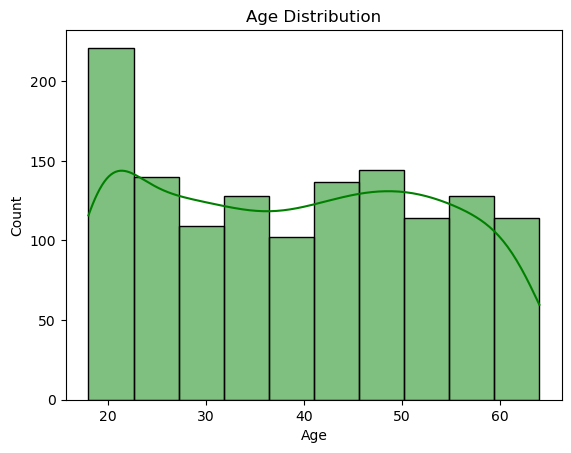

In [35]:
#age distribution
sns.histplot(df.age,bins=10,kde=True,color='Green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

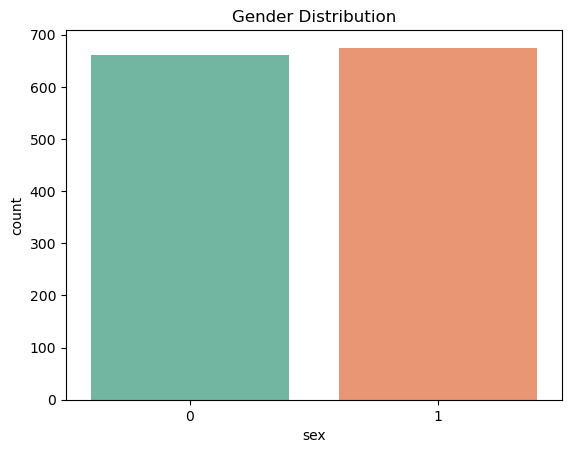

In [36]:
#gender plot
sns.countplot(x = 'sex', data = df,palette='Set2')
plt.title('Gender Distribution')

The dataset exhibits a balanced distribution between males and females, with comparable numbers present in each category.

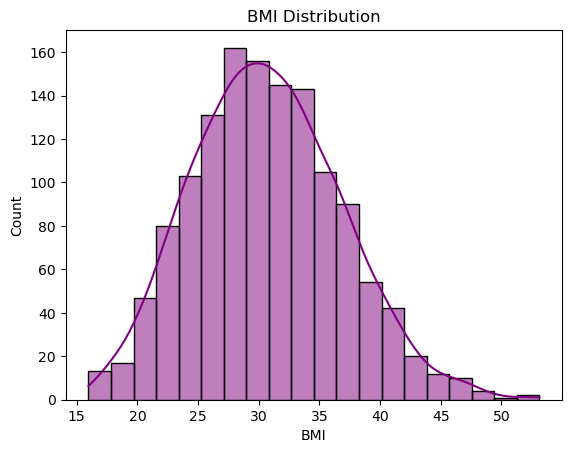

In [37]:
#bmi distribution
sns.histplot(df.bmi,bins=20, kde=True,color='purple')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

A significant portion of the patient population falls within the BMI range of 25 to 40, indicating a prevalence of overweight individuals, which may contribute significantly to the escalation of medical expenses.
- BMI of 18.4 and below indicates that a person is underweight.
- BMI between 18.5 and 24.9 characterizes a person with normal weight.
- BMI between 25 and 29.9 indicates that a person is overweight.
- BMI of 30 and above indicates that a person is obese.

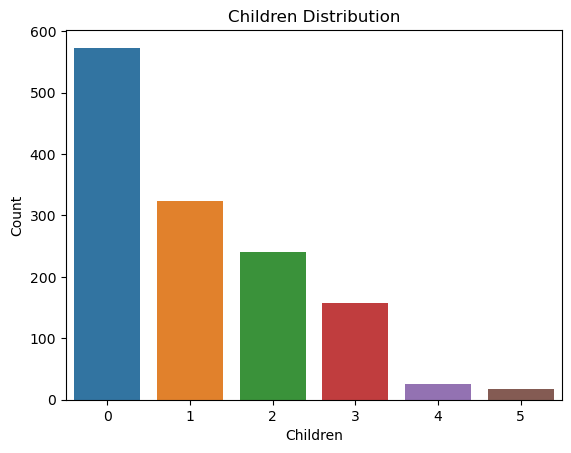

In [38]:
#child count distribution
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

The graph illustrates a notable trend where the majority of patients do not have children, while only a small percentage of patients have three or more children.`

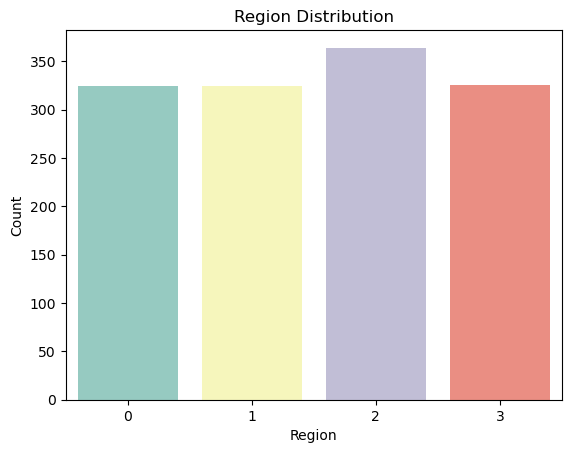

In [39]:
# Plotting region distribution
sns.countplot(x='region', data=df, palette='Set3')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


The count of patients from the northwest region slightly outweighs the other regions, while the number of patients from the remaining regions appears to be almost equal.

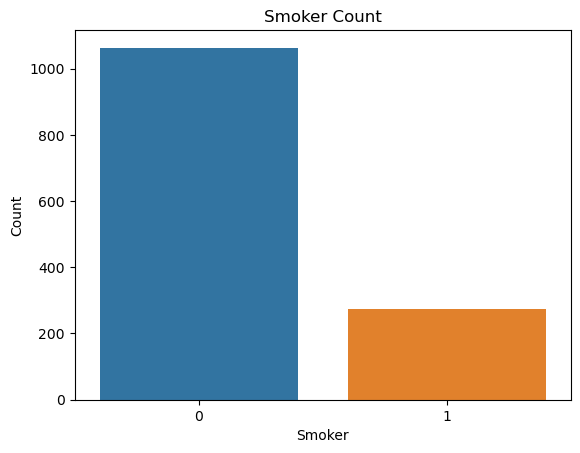

In [40]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

Smokers constitute a minority within the dataset, with nearly 80% of the patients identified as non-smokers.

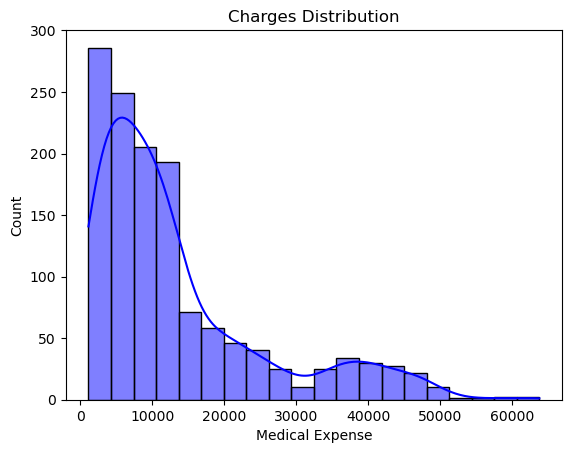

In [41]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='blue')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

The majority of medical expenses fall below 20,000, with only a marginal fraction of patients experiencing expenses surpassing 50,000. Through the aforementioned visualizations, we have acquired a comprehensive comprehension of patient counts across various variable categories. Now, I will delve into exploring the correlations among these variables.

<h1 style="background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>4.  Correlation</b></h1><a id = "4" ></a>

In [42]:
#pearson by default
correlation_matrix = df.corr()
correlation_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


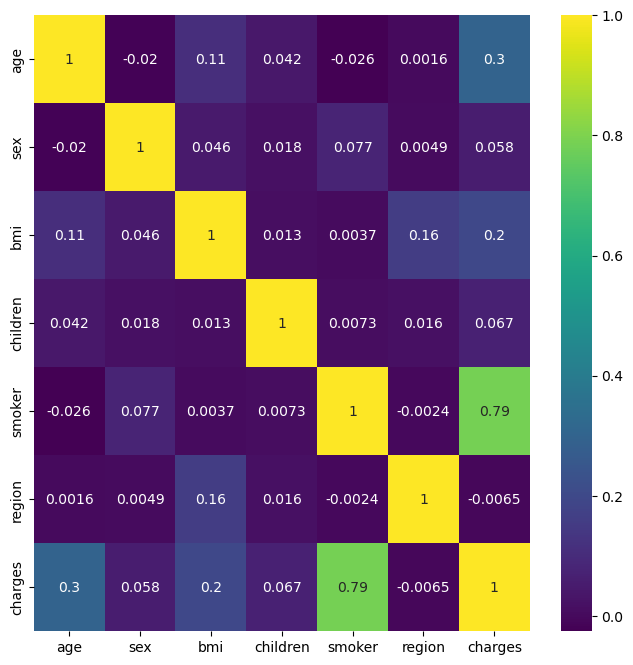

In [43]:
#plotting the correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [44]:
# # Improve clarity for all pairs of variables
corr_pairs = correlation_matrix.unstack()
corr_pairs

age       age         1.000000
          sex        -0.019814
          bmi         0.109344
          children    0.041536
          smoker     -0.025587
          region      0.001626
          charges     0.298308
sex       age        -0.019814
          sex         1.000000
          bmi         0.046397
          children    0.017848
          smoker      0.076596
          region      0.004936
          charges     0.058044
bmi       age         0.109344
          sex         0.046397
          bmi         1.000000
          children    0.012755
          smoker      0.003746
          region      0.157574
          charges     0.198401
children  age         0.041536
          sex         0.017848
          bmi         0.012755
          children    1.000000
          smoker      0.007331
          region      0.016258
          charges     0.067389
smoker    age        -0.025587
          sex         0.076596
          bmi         0.003746
          children    0.007331
        

In [45]:
# Sorted
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

age     smoker    -0.025587
smoker  age       -0.025587
age     sex       -0.019814
sex     age       -0.019814
region  charges   -0.006547
dtype: float64

In [46]:
high_positive_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_positive_corr.head()

charges   smoker      0.787234
smoker    charges     0.787234
age       age         1.000000
children  children    1.000000
smoker    smoker      1.000000
dtype: float64

The smokers show a significant corelation with their corresponding medical expenses. . Next, I'll delve deeper into the smoking habits of patients and their interplay with other variables.

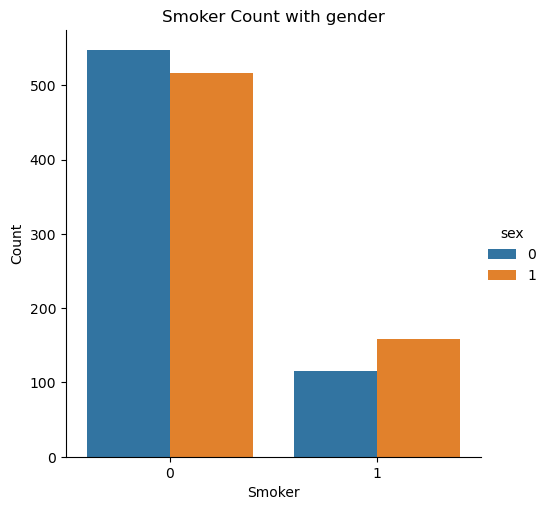

In [47]:
# Smoker and Gender
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

Considering the higher proportion of male smokers compared to female smokers, it could potentially serve as an indication that medical expenses for males might surpass those for females, particularly given the high positive correlation with medical costs.

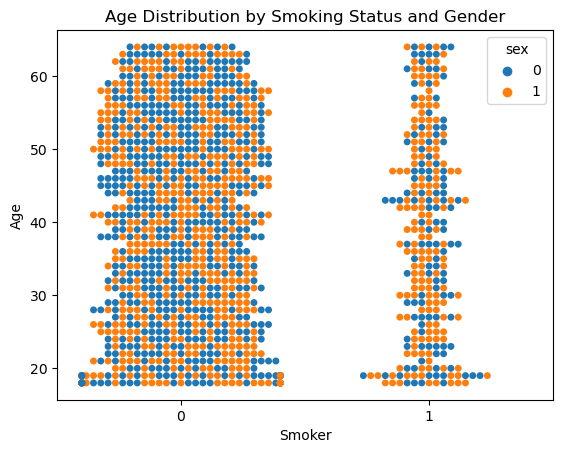

In [48]:
# Smokers and Age distribution
sns.swarmplot(x="smoker", y="age", hue="sex", data=df)
plt.title('Age Distribution by Smoking Status and Gender')
plt.xlabel('Smoker')
plt.ylabel('Age')
plt.show()


It's clear from the graph that there is a significant number of smokers at the age of 19. Consequently, I'll now delve into examining the medical expenses incurred by smokers aged 19.


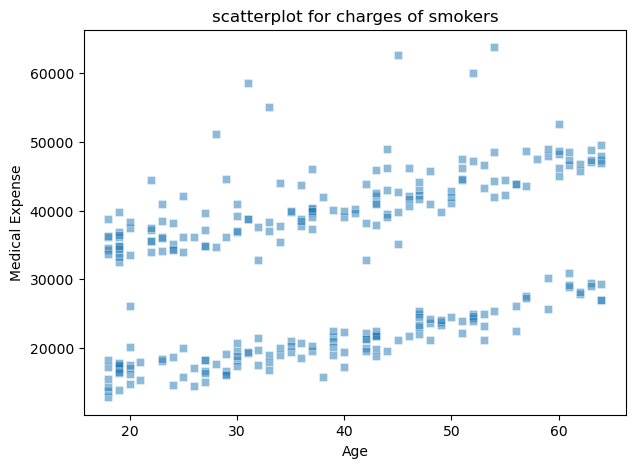

In [49]:
# smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges",alpha=0.5,marker='s', data = df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

In this graph, we observe a distinctive pattern. There are two distinct segments: one exhibiting high medical expenses, possibly linked to smoking-related illnesses, and another showing lower medical expenses, likely associated with age-related health issues.

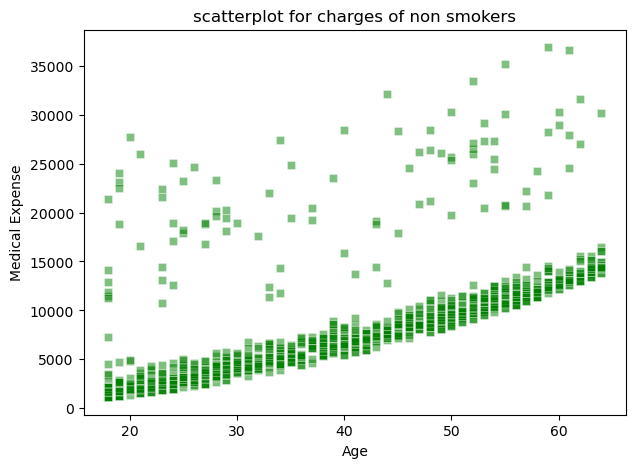

In [50]:
#non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges",alpha=0.5,marker='s',color='green', data = df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

The majority of the data points indicate a positive correlation between medical expenses and age, likely attributed to the increased susceptibility to illness among older individuals. However, the presence of outliers shows that other factors, such as unforeseen illnesses or accidents, may also contribute to higher medical expenses.

**Charges distribution for patients with BMI greater than 25 i.e. obese
patients**

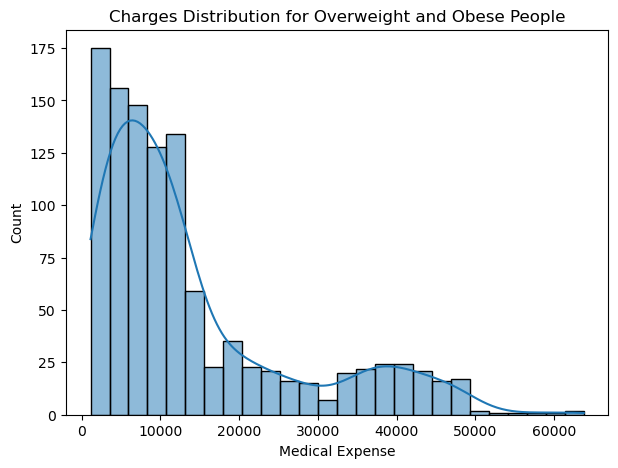

In [51]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.histplot(df[(df.bmi >= 25)]['charges'],kde=True)
plt.title('Charges Distribution for Overweight and Obese People')
plt.xlabel('Medical Expense')
plt.show()

**Charges distribution for patients with BMI less than 25 i.e. obese
patients**

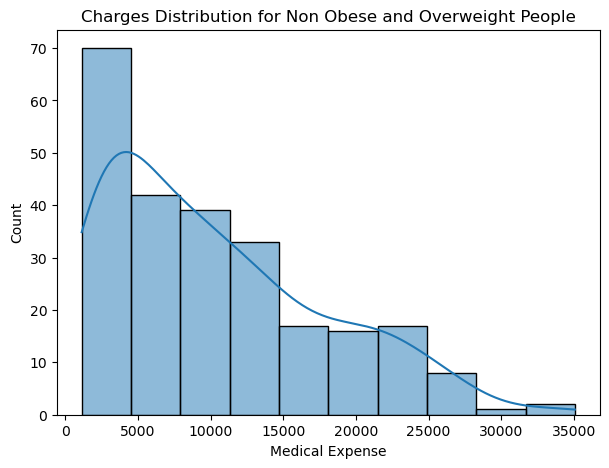

In [52]:
plt.figure(figsize=(7,5))
sns.histplot(df[(df.bmi < 25)]['charges'],kde=True)
plt.title('Charges Distribution for Non Obese and Overweight People')
plt.xlabel('Medical Expense')
plt.show()

Hence, individuals with a BMI below 25 tend to incur lower medical expenses compared to those with a BMI greater than 25.

**After conducting Exploratory Data Analysis (EDA), we have gained valuable insights into the dataset and the relationships between its variables. Now, I will proceed to construct a predictive model aimed at estimating the medical expenses of patients.**






<h1 style="background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>5.  Data Split</b></h1><a id = "5" ></a>

In [55]:
x = df[['age','sex','children','smoker','region']]
x.head()

,age,sex,children,smoker,region
0,19,0,0,1,3
1,18,1,1,0,2
2,28,1,3,0,2
3,33,1,0,0,1
4,32,1,0,0,1


In [59]:
y =df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

#### Perform 80/20 Data split

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20,random_state=42)



#### Data dimension

In [172]:
x_train.shape, y_train.shape

((1069, 5), (1069,))

In [173]:
x_test.shape, y_test.shape

((268, 5), (268,))

<h1 style="background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>6.   Regression Models</b></h1><a id = "6" ></a>

### Multiple Linear Regression

It is build based on the limitation that linear regression can perform well only if there is a linear correlation between the input variables and the output variable.

In [308]:
# Defines the linear regression model
mlr = LinearRegression()

In [309]:
# Build training model
mlr.fit(x_train,y_train)

LinearRegression()

In [310]:
mlr.coef_

array([  265.36269222,    88.48937512,   531.88449548, 22962.58573319,
          34.83177652])

In [311]:
mlr.intercept_

-2643.781492085618

In [316]:
# Apply trained model to make prediction on(test set)
y_pred_test = mlr.predict(x_test)
# Apply trained model to make prediction on(train set)
y_pred_train = mlr.predict(x_train)



### Model evaluation

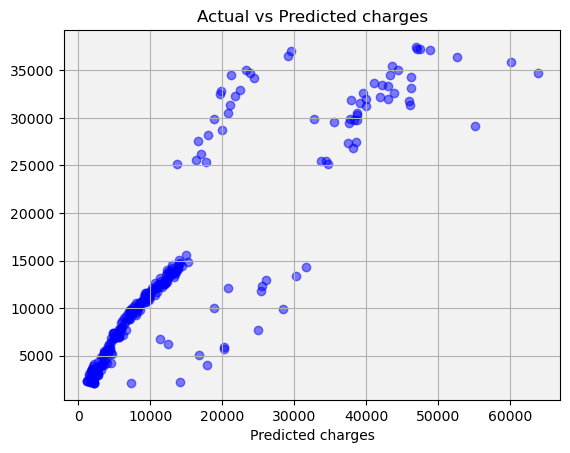

In [313]:

plt.scatter(y_test,y_pred_test,alpha=0.5,facecolor='blue')
plt.xlabel('Actual charges')
plt.xlabel('Predicted charges')
plt.title('Actual vs Predicted charges') 
plt.gca().set_facecolor((0.95, 0.95, 0.95))  
plt.grid(True)
plt.show()


Some of the data prediction looks prety good but some of the data lools very sparse.We want to know how much prediction is good and how much prediction is not good,for that we can use **r_2 score.**

In [322]:
#model accuracy
r2_score(y_test,y_pred_test)

0.7733838339975007

The R-squared (R²) shows how much of the total variance of the dependent variable is explained by the variability of the independent variables in the model. **Here, we would say that the model is acceptable.** However, the R-squared is a useful measure to understand how much variance is explained by the model, but it does not provide a complete picture of the model's performance. It is always good to combine R-squared with other evaluation metrics and analyze the results critically.

#### Mean absolute error method

In [315]:
# Test 
mean_absolute_error(y_test,y_pred)


4178.019110021922

In [317]:
# Train 
mean_absolute_error(y_train,y_pred_train)

4129.560773300334

Τhe mean absolute error between the training and test sets is very close, it indicates that the model's performance on both datasets is similar.In other words, the model is not overfitting to the training data and is likely to make accurate predictions on new, unseen data.

### Polynomial Regression

The basic assumption is that the relationship between dependent and independent variable is not linear and it is not necessary both dependent and independent variable are continuous. it can also be applied to categorical variables. However, it's essential to note that the interpretation of the model may become more complex when dealing with categorical variables.



In [194]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scale the training data
x_train_scaler = scaler.fit_transform(x_train)

# Transform the test data using the same scaler fitted on the training data to maintain consistency
# and avoid information leakage
x_test_scaler = scaler.transform(x_test)
    


### Model Development

In [319]:
polyn_reg = PolynomialFeatures(degree=6)
x_polyn_train = polyn_reg.fit_transform(x_train_scaler)
x_test_polyn_reg = polyn_reg.transform(x_test_scaler)
polyn_reg.fit(x_polyn_train,y_train)
mlr.fit(x_polyn_train, y_train)

LinearRegression()

In [320]:
#model prediction train
y_pred_train = mlr.predict(x_polyn_train)
#model prediction test
y_pred = mlr.predict(x_test_polyn_reg)


###  Model Evaluation 



**Mean absolute error method**

In [226]:
mean_absolute_error(y_train,y_pred_train)

3152.039564536951

In [227]:
mean_absolute_error(y_test,y_pred)

472109220401.52014

As is evident, there is a significant disparity in the mean absolute error between the training and test datasets, which is indicative of overfitting. **This occurred because the degree of the polynomial was arbitrarily chosen.** This is not desirable because the model has learned the training data well and may not generalize well to unseen data.**To address this issue, we will change the degree of the polynomial and will compare the mean absolute error between train and test.**

In [324]:
polyn_reg = PolynomialFeatures(degree=2)
x_polyn_train = polyn_reg.fit_transform(x_train_scaler)
x_test_polyn_reg = polyn_reg.transform(x_test_scaler)
polyn_reg.fit(x_polyn_train,y_train)
mlr.fit(x_polyn_train, y_train)

LinearRegression()

In [325]:
#model prediction
y_pred_train = mlr.predict(x_polyn_train)
mean_absolute_error(y_train,y_pred_train)


3963.4355174679904

In [326]:
y_pred = mlr.predict(x_test_polyn_reg)
mean_absolute_error(y_test,y_pred)

4178.019110021922

**As we can clearly see, the problem appears to be resolved as the mean absolute error between the training and test sets is very close.**

In [327]:
#model accuracy
r2_score(y_test,y_pred)

0.7696860498385152

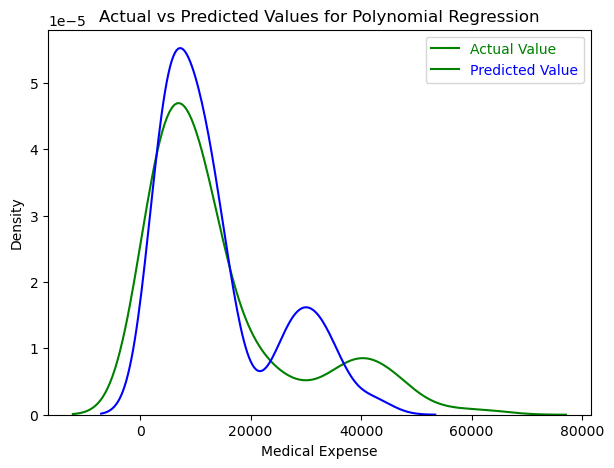

In [330]:
# actual vs predicted values for polynomial regression
plt.figure(figsize=(7,5))
ax1 = sns.kdeplot(y_test, color='g', label='Actual Value')
ax2 = sns.kdeplot(y_pred, color='b', label='Predicted Value', ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.legend(handles=[ax1.lines[0], ax2.lines[0]], labels=['Actual Value', 'Predicted Value'],labelcolor=['g','b'])
plt.show()


In [329]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 4178.019110021922
R2 Score: 0.7696860498385152


<h1 style="background-color: #f0f0f0; padding: 15px; border-radius: 5px;"><b>7.   Conclusion</b></h1><a id = "7" ></a>

Based on the above models, we can see that the two approaches are equivalent. This conclusion is supported by the similar values of R-squared and mean absolute error obtained from both approaches.

Additionally, through further examination, it becomes apparent that several factors     significantly influence medical expenses. Specifically, smokers tend to have higher medical expenses compared to non-smokers. Moreover, individuals with a Body Mass Index (BMI) exceeding 25 exhibit higher medical costs than those with a BMI below 25. Furthermore, older patients generally incur higher medical expenses than younger individuals.


In summary, the analysis suggests that medical expenses are importantly linked to age, BMI, and smoking habits.